### Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database

The database includes the following indicators:

country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
country_long (text): longer form of the country designation
name (text): name or title of the power plant, generally in Romanized form
gppd_idnr (text): 10 or 12 character identifier for the power plant
capacity_mw (number): electrical generating capacity in megawatts
latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
primary_fuel (text): energy source used in primary electricity generation or export
other_fuel1 (text): energy source used in electricity generation or export
other_fuel2 (text): energy source used in electricity generation or export
other_fuel3 (text): energy source used in electricity generation or export
commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
owner (text): majority shareholder of the power plant, generally in Romanized form
source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
url (text): web document corresponding to the source field
geolocation_source (text): attribution for geolocation information
wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
year_of_capacity_data (number): year the capacity information was reported
generation_data_source (text): attribution for the reported generation information
generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014
estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015
estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016
estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017
Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction:

Make two prediction for labels

primary_fuel
capacity_mw

In [50]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Classification

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Regression

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [125]:
df = pd.read_csv(r"https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [126]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.500,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.000,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.200,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.000,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.000,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.000,23.7689,68.6447,Coal,Oil,NaN,NaN,2005.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.000,10.4547,77.0078,Hydro,NaN,NaN,NaN,1970.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,157.558250,152.195200,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.000,32.2258,77.2070,Hydro,NaN,NaN,NaN,2010.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,674.391100,721.335200,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.000,16.3300,75.8863,Hydro,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,480.594950,144.434200,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.000,23.1642,81.6373,Coal,Oil,NaN,NaN,2008.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


## Exploratory Data Analysis (EDA)

In [54]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Ensuring that in future observations we do not have any truncated information being displayed in our Jupter Notebook.

## 

In [55]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

Taking a look at all the 25 column names present in our dataset.

## 

In [56]:

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64


In the above cell we can see that there are missing values in many columns and few even have all the 908 rows empty that will need to be removed since it provides no insights.

Column names that have more than 50% (more than 454 rows) of missing data and will need to be deleted are:

other_fuel1
other_fuel2
other_fuel3
owner
wepp_id
generation_gwh_2013
generation_gwh_2014
generation_gwh_2015
generation_gwh_2016
generation_gwh_2017
generation_data_source
estimated_generation_gwh## 

In [57]:
df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017",
        "generation_data_source", "estimated_generation_gwh"], axis=1, inplace=True)

Have dropped all the column that had more than 50% of missing data since it made no sense to treat such a huge chunk of missing value and ultimately make our model biased towards those missing value treated data.## 

In [58]:
df.shape

(907, 15)

Now our column numbers have been reduced to 13 from the initial value of 25.

## 

In [59]:
df.nunique().to_frame("Unique Values")

,Unique Values
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
commissioning_year,73
source,191


With the help of nunique method we were able to check the unique data information present in our dataset columns.

Now observing the columns "country" and "country_long" we can see that it only has 1 unique data filled in all 908 rows and does not provide any insight so it can be deleted.

Similarly, the column "year_of_capacity_data" also has 1 single value present in it's rows and has missing data as well so it will not provide any useful information and can be deleted.

Also I see that columns "name" and "gppd_idnr" have all unique data in all the 908 rows of the dataset and being a unique identifier would help building a machine learning model either and can be deleted too.

Finally, I see that there is a column "url" which basically holds web document links and values such as those or descriptions do not really help in machine learning models and we will be deleteing it too.

Jotting down the names of columns that we will need to remove are:

country
country_long
year_of_capacity_data
name
gppd_idnr
url## 

In [60]:
df.drop(["country", "country_long", "year_of_capacity_data", "name", "gppd_idnr", "url"], axis=1, inplace=True)



We have successfully dropped 6 more columns that were not providing any useful insight for our predition models.

## 


In [61]:
print(df.shape)
df.head()

(907, 9)


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,626.239128,NaN
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,7279.000000,NaN


Now our new dataset has 908 rows and 7 columns after we got rid of all the useless columns post analysis from it's original number of 25.

## 

In [62]:

df.isna().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64


Okay so we still have missing values present in our dataset columns that will need to be treated now. But before that we will separate our categorical columns and numerical columns so that application of meand and mode will become easier.## 

In [63]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   527 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   888 non-null    object 
 7   generation_gwh_2018  448 non-null    float64
 8   generation_gwh_2019  0 non-null      float64
dtypes: float64(6), object(3)
memory usage: 63.9+ KB


Using the info method we can see that out of the 7 columns present in our filtered dataset we have 4 numerical data valued columns and 3 object data valued columns.

## 

In [64]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ", object_datatype)


# getting the list of float data type column names
float_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Data Type Columns are: ", float_datatype)

Object Data Type Columns are:  ['primary_fuel', 'source', 'geolocation_source']
Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2018', 'generation_gwh_2019']


We have successfully bifurcated the object datatype column names and float data type column names. Since we do not have to worry about outliers and skewness in categorical columns we can use this separated column names to pre process only on numerical continous columns.## 

In [65]:
# filling missing data for continous values with mean
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

# filling missing data for categorical values with mode
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

Since we had to take care of the missing data I have chosen to fill the null values in continous data column with it's mean and the null values for categorical data column with it's mode information.## 

In [66]:
df.isna().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
geolocation_source       0
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

Awesome we have now successfully taken care of all the missing data present in our dataset.

## 

In [67]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)


primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
source
Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            4
Reliance Power Ltd                                               4
Rajasthan Renewable Energy Corporation Limited (RREC)            4
Jk Cement ltd                                                    4
Acc Acc ltd                                                      4
Jaypee Ltd jccl)                                                 3
Hindustan Zinc ltd                                               3
PEDA                   

In the above cell I am taking a look at the object data type columns so as to check how many categories each of them hold and how many values/rows are populated with that data.## 

## Visualization


In [68]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2018', 'generation_gwh_2019'],
      dtype='object')

Listing down the names of all the columns present in our filtered dataframe. We will analyze each one of them with the help of some visual plots.

## 

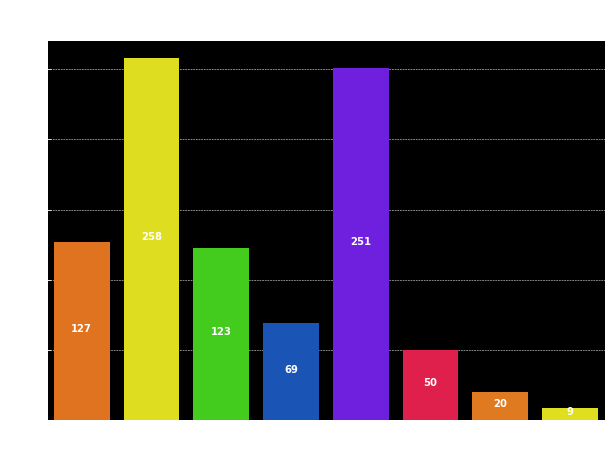

In [69]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'primary_fuel'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

In the above count plot for "primary_fuel" column we can see that the highest number of values have been covered by coal and hydro fuel types then comes solar and wind. Finally we see that gas, biomass, oil and nuclear have very low data counts.

However when we will be considering "primary_fuel" as our target label then this is impose a class imbalance issue while trying to create a classification model and therefore will need to be treated accordingly.## 

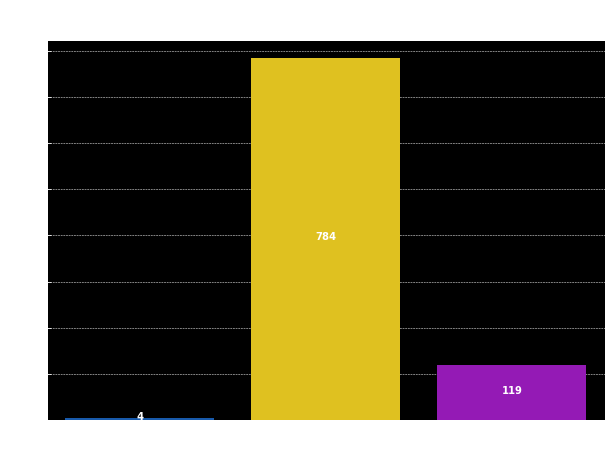

In [70]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'geolocation_source'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

In the above count plot for "geolocation_source" column we see that the highest data value is covered by WRI option and the least value which seems quite negligible has been accumulated by National Renewable Energy Laboratory.## 

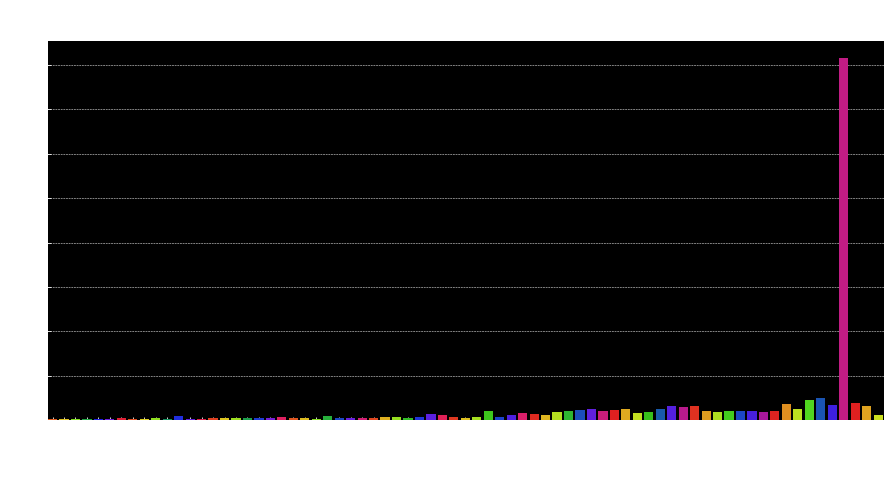

In [71]:
plt.figure(figsize=(15,7))
values = list(df['commissioning_year'].unique())
diag = sns.countplot(df["commissioning_year"], palette="prism")
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

In the above count plot we can see the list of years as to when the power plant data was made available. Since we had missing values in the "commissioning_year" column we replaced it with the mode wherein the year 1954 covered the most rows in our dataset compared to all the other years## 

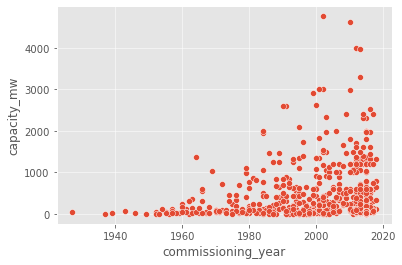

In [72]:
plt.style.use('ggplot')
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = df)
plt.show()

In the above scatter plot we can see that the electricity generating capacity measured in mega watts was pretty low in the olden times as compared to recent years due to the invention of efficient fuel types used for power generation.## 

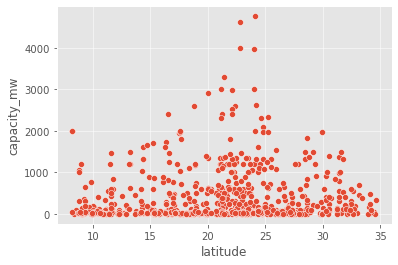

In [73]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()

In the above scatter plot we can see that the latitude geolocation for electricty generation is highest measuring the mega watts between 20 to 25 decimal degrees.

## 

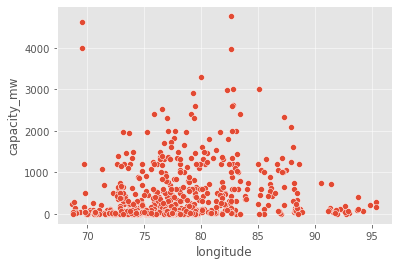

In [74]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

In the above scatter plot we can see that the longitude geolocation for electricty generation is highest measuring the mega watts around 70 and then again between 80-85 decimal degrees.## 

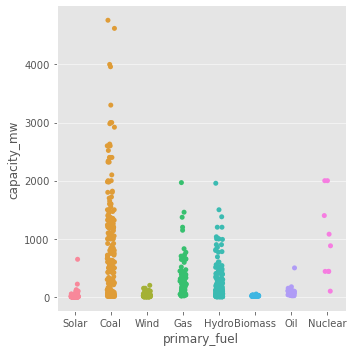

In [75]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

In the above categorical plot we can see that coal is the highest contender when it comes to generating electricity and biomass is used the least.

## 

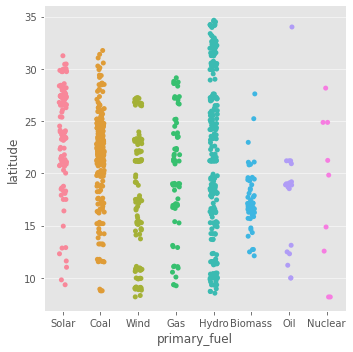

In [76]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()

In the above categorical plot we can see that hydro fuel type is distributed across all the latitude values considering the water bodies that help in generating electricity at a power plant.##

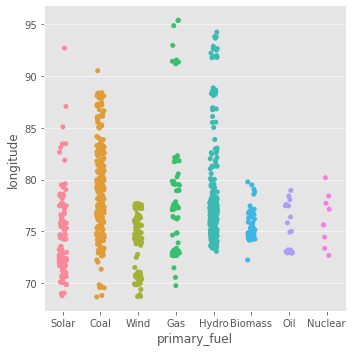

In [77]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)
plt.show()

In the above categorical plot we can see that longitude wise decimal degress have quite a splitting data between coal and hydro considering the land lock areas rely on coal for electricity generation and costal area rely mostly on the hydro fuel type. Then we have fuel types solar and wind that are quite comprising when targeted across the longitude values.## 

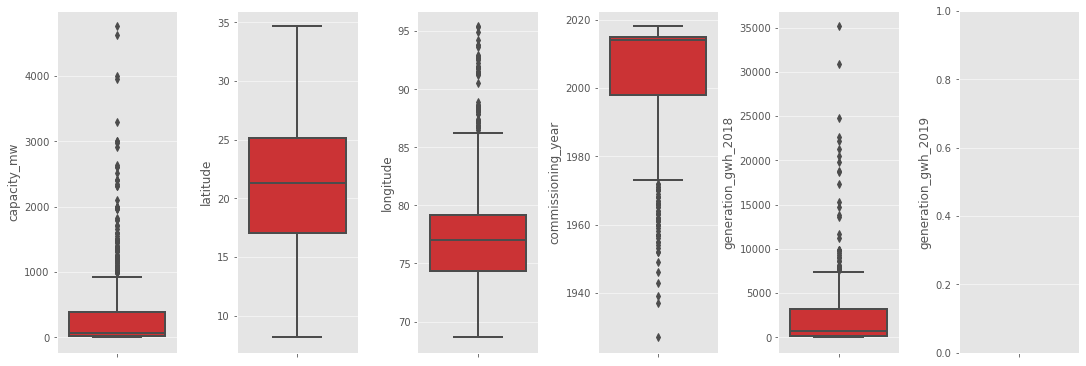

In [78]:
num_cols = len(df[float_datatype].columns)
num_rows = 1
fig, ax = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(15,5))
ax = ax.flatten()

for i, (col, value) in enumerate(df[float_datatype].items()):
    sns.boxplot(y=col, data=df, ax=ax[i], palette="Set1")

plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

In the above box plot we can see presence of outliers in our numerical columns that will need to be checked before we start building any machine learning model.

## 

IndexError: index 4 is out of bounds for axis 0 with size 4

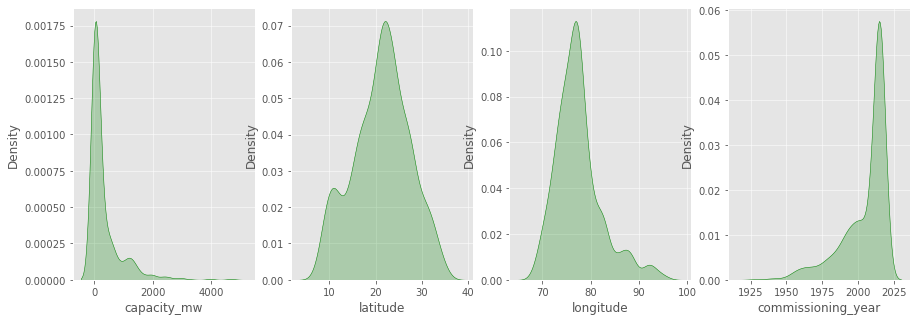

In [79]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()


In the above distribution plot created for our numerical data columns we see skewness and that will need to be treated before we can proceed with our model building process.## 

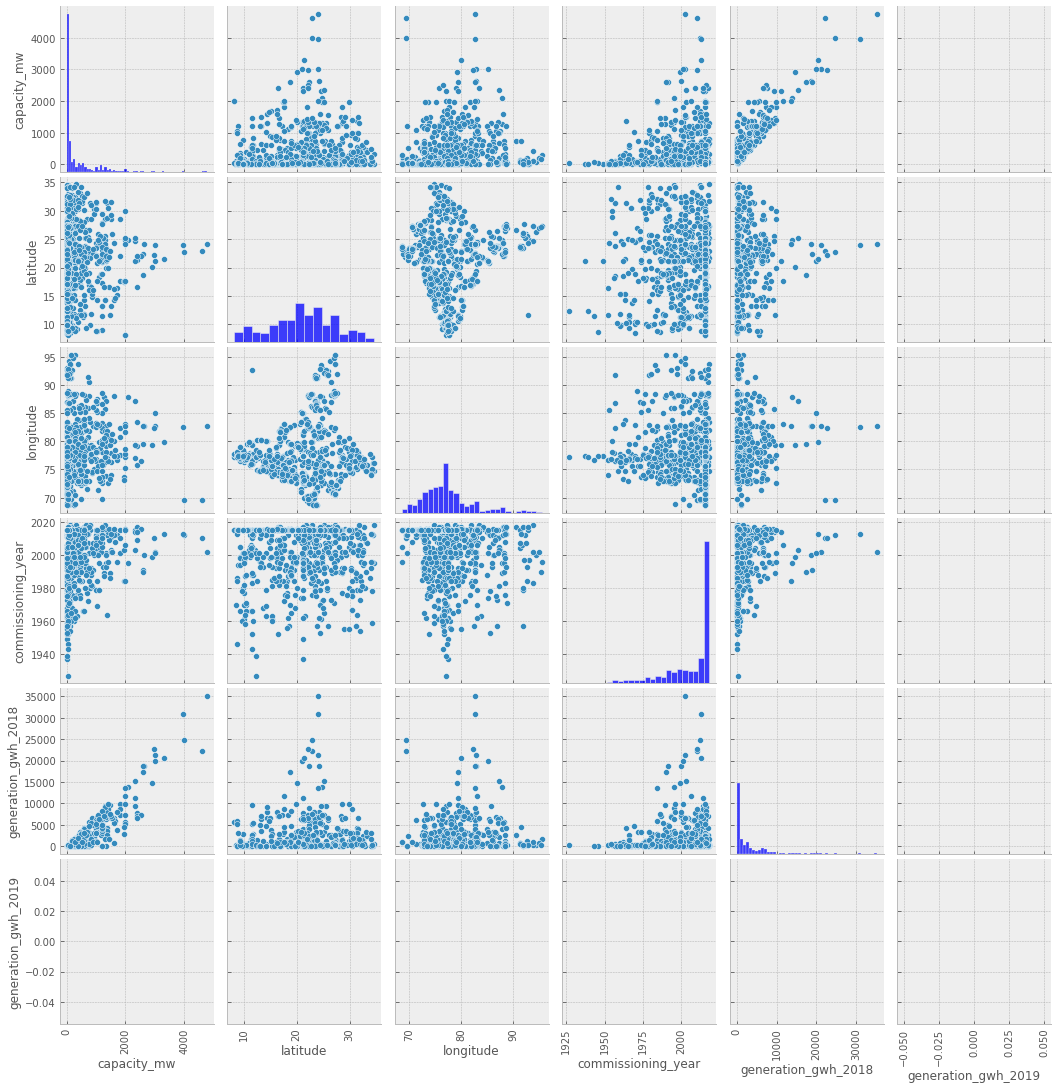

In [80]:
plt.style.use('bmh')
g = sns.pairplot(df)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

From the above pair plot we can see the data distribution amongst the numerical data type columns.

## 

## Encoding all the object datatype columns


In [81]:
# Label Encoder

le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN
1,98.0,24.7663,74.6090,1,2015.0,Ultratech Cement ltd,WRI,NaN,NaN
2,39.2,21.9038,69.3732,7,2015.0,CDM,WRI,NaN,NaN
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI,626.239128,NaN
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI,7279.000000,NaN


I am using Label Encoder on our target column "primary_fuel" since we want our labels to be converted from the object datatype to numerical datatype.

## 

In [82]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['geolocation_source'] = oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['source'] = oe.fit_transform(df['source'].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0,NaN,NaN
1,98.0,24.7663,74.6090,1,2015.0,174.0,2.0,NaN,NaN
2,39.2,21.9038,69.3732,7,2015.0,21.0,2.0,NaN,NaN
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0,626.239128,NaN
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0,7279.000000,NaN


I am using the Ordinal Encoder to convert all the categorical feature columns from object datatype to numerical datatype. I could have used one hot encoding but considering that "source" column has lots of unique values the number of columns would have increased a lot so I felt ordinal encoding was a better option here.## 

## Correlation using a Heatmap


Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.## 

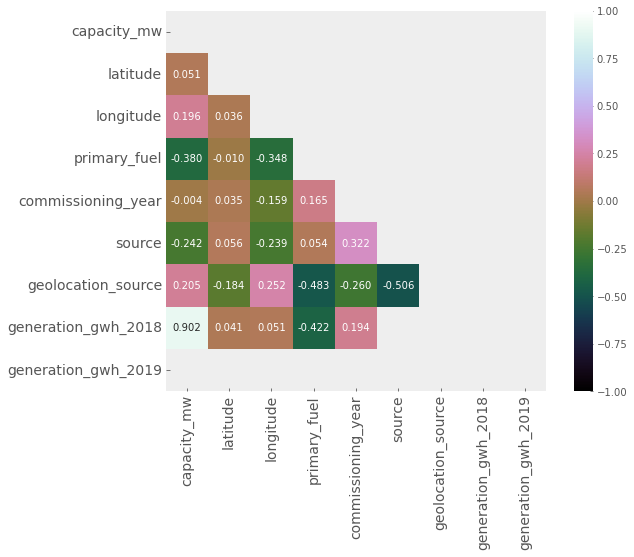

In [83]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In the above heatmap we can see that our target labels "capacity_mw" and "primary_fuel" has both positive and negative correlations with the remaining feature columns. Also we see very less or negligible amount of multi colinearity so we will not have to worry about it. Since the one's which are reflecting the value are inter dependent on those feature columns and I intend to retain and keep them.## 

## Correlation Bar Plot comparing features with our labels


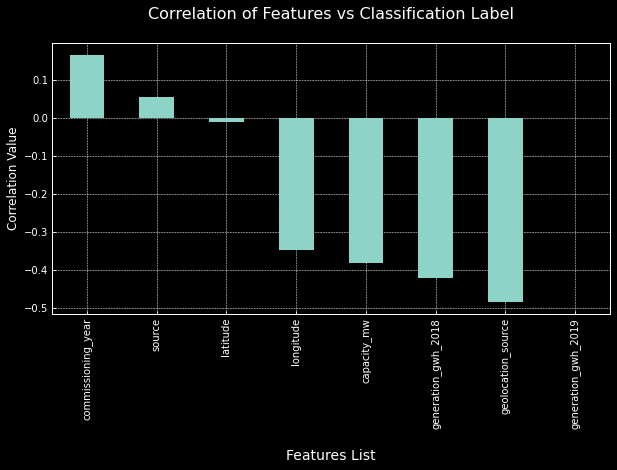

In [84]:
plt.style.use('dark_background')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

When we consider our classification label "primary_fuel" then we can see the remaining columns that are the features have 2 of them with positive correlation and 4 of them with neagtive correlation.## 

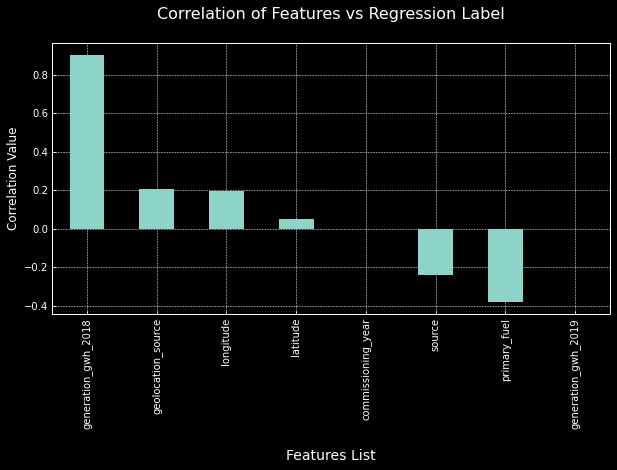

In [85]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

When we consider our regression label "capacity_mw" then we can see the remaining columns that are the features have 4 of them with positive correlation and 2 of them with neagtive correlation.## 

## Using Z Score to remove outliers


In [97]:
print("Shape of the dataframe before removing outliers: ", df.shape)
print("Shape of the dataframe after removing outliers: ", df1.shape)

if df.shape[0] != 0:
    percentage_loss = (df.shape[0] - df1.shape[0]) / df.shape[0] * 100
    print("Percentage of data loss post outlier removal: ", percentage_loss)
else:
    print("Percentage of data loss post outlier removal: Not applicable (DataFrame has zero rows)")

df = df1.copy()


Shape of the dataframe before removing outliers:  (0, 9)
Shape of the dataframe after removing outliers:  (0, 9)
Percentage of data loss post outlier removal: Not applicable (DataFrame has zero rows)


 have used the Z score method to remove the outliers since the IQR method was making me lose way more than 10 percent of data which I could not have afforded to lose.## 

In [98]:
df.skew()

capacity_mw           NaN
latitude              NaN
longitude             NaN
primary_fuel          NaN
commissioning_year    NaN
source                NaN
geolocation_source    NaN
generation_gwh_2018   NaN
generation_gwh_2019   NaN
dtype: float64

The skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 skewness value.

## 

## Using Log Transform to fix skewness


In [99]:
for col in float_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

I have applied Log Transformation on our numerical float datatype columns to ensure that we do not have skewness in our dataset.

## 

## Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and classification label

In [105]:
X = df.drop('primary_fuel', axis=1)
Y = df['primary_fuel']

I have bifurcated the dataset into features and classification label where X represents all the feature columns and Y represents the classification target label column.

## 


##  Resolving the class imbalance issue in our label column


In [106]:
Y.value_counts()

Series([], Name: primary_fuel, dtype: int64)

In [107]:
from imblearn.over_sampling import SMOTE

In [120]:
df_encoded = pd.get_dummies(df, columns=['primary_fuel'])




In [128]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load the data into a DataFrame
df = pd.read_csv(r"https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['primary_fuel'])

# Separate the features (X) and labels (Y)
X = df_encoded.drop('target_column', axis=1)
Y = df_encoded['target_column']

# Check if the DataFrame is empty
if not X.empty:
    oversample = SMOTE()
    X_resampled, Y_resampled = oversample.fit_resample(X, Y)
else:
    print("DataFrame 'df' is empty.")


KeyError: "['target_column'] not found in axis"

## Feature Scaling

In [109]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

ValueError: Found array with 0 sample(s) (shape=(0, 8)) while a minimum of 1 is required by StandardScaler.

## Finding best random state for building Classification Models


In [110]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [111]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=45)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.## 

In [112]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [113]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.